Nama : Rohmat<br>
NIM : 211351131<br>
Kelas : TIF Pagi B

## import Dataset

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rohmatif","key":"f14538077a6cda2bc2b9cc0bf0fabc0f"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d shazadudwadia/supermarket

  0% 0.00/323 [00:00<?, ?B/s]
100% 323/323 [00:00<00:00, 606kB/s]


In [4]:
!mkdir supermarket
!unzip supermarket.zip -d supermarket
!ls supermarket

Archive:  supermarket.zip
  inflating: supermarket/GroceryStoreDataSet.csv  
GroceryStoreDataSet.csv


# import library yang digunakan

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from pandas.plotting import parallel_coordinates

## Data Discovery

In [31]:
df=pd.read_csv('/content/supermarket/GroceryStoreDataSet.csv')
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,"MILK,BREAD,BISCUIT"
0,"BREAD,MILK,BISCUIT,CORNFLAKES"
1,"BREAD,TEA,BOURNVITA"
2,"JAM,MAGGI,BREAD,MILK"
3,"MAGGI,TEA,BISCUIT"
4,"BREAD,TEA,BOURNVITA"
5,"MAGGI,TEA,CORNFLAKES"
6,"MAGGI,BREAD,TEA,BISCUIT"
7,"JAM,MAGGI,BREAD,TEA"
8,"BREAD,MILK"
9,"COFFEE,COCK,BISCUIT,CORNFLAKES"


In [7]:
df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,"MILK,BREAD,BISCUIT"
count,19
unique,16
top,"BREAD,TEA,BOURNVITA"
freq,2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   MILK,BREAD,BISCUIT  19 non-null     object
dtypes: object(1)
memory usage: 280.0+ bytes


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
df.columns=['NAME ITEMS']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,NAME ITEMS
0,"BREAD,MILK,BISCUIT,CORNFLAKES"
1,"BREAD,TEA,BOURNVITA"
2,"JAM,MAGGI,BREAD,MILK"
3,"MAGGI,TEA,BISCUIT"
4,"BREAD,TEA,BOURNVITA"
5,"MAGGI,TEA,CORNFLAKES"
6,"MAGGI,BREAD,TEA,BISCUIT"
7,"JAM,MAGGI,BREAD,TEA"
8,"BREAD,MILK"
9,"COFFEE,COCK,BISCUIT,CORNFLAKES"


## Exploratory Data Analysis (EDA)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-14-913855e82466>:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  one_hot_df = pd.get_dummies(transactions.apply(pd.Series).stack()).sum(level=0)


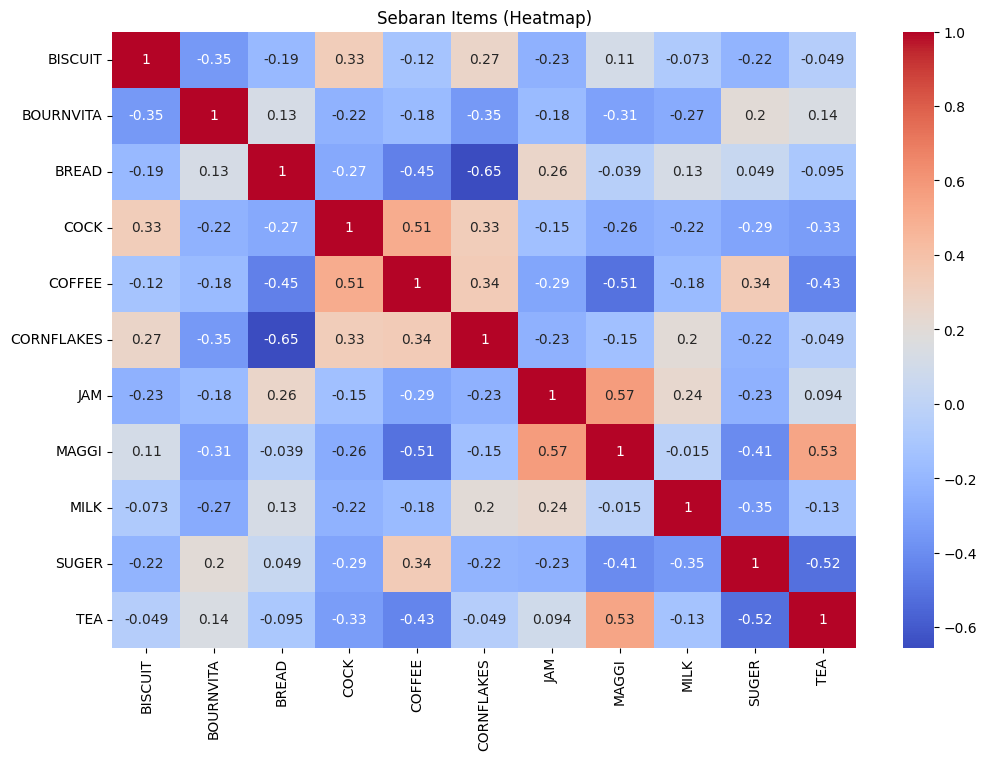

In [14]:
transactions = df['NAME ITEMS'].str.split(',')
one_hot_df = pd.get_dummies(transactions.apply(pd.Series).stack()).sum(level=0)
plt.figure(figsize=(12, 8))
sns.heatmap(one_hot_df.corr(), annot=True, cmap="coolwarm")
plt.title('Sebaran Items (Heatmap)')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


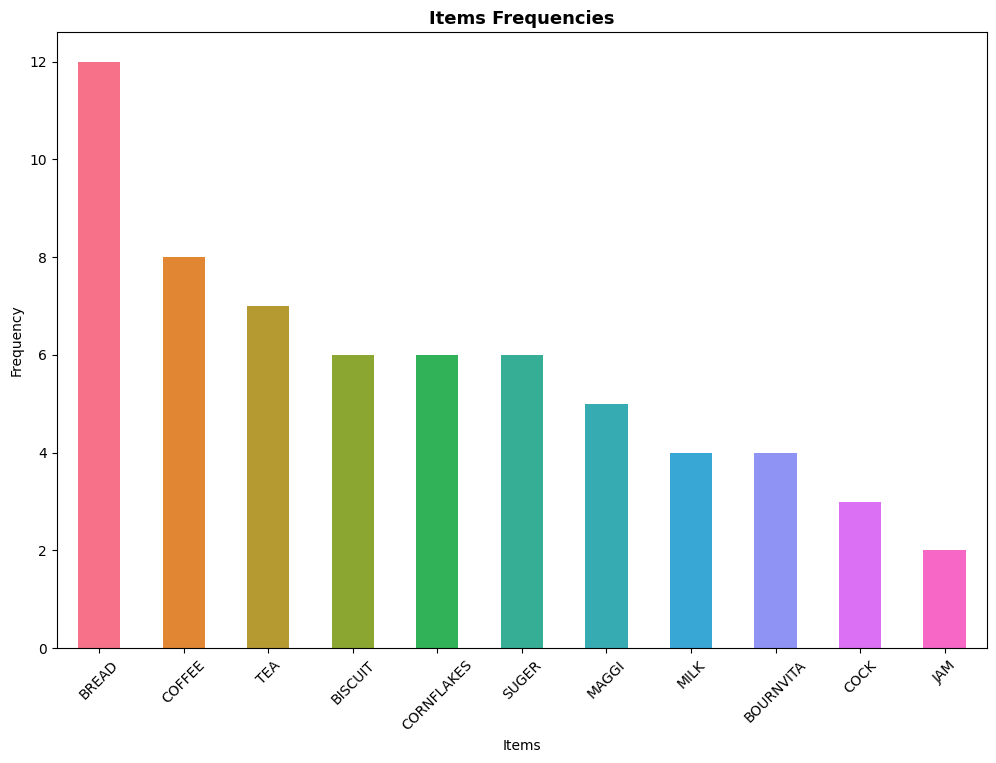

In [16]:
df['items_list'] = df['NAME ITEMS'].apply(lambda x: x.split(','))
all_items = [item for sublist in df['items_list'] for item in sublist]
item_counts = pd.Series(all_items).value_counts()
colors = sns.color_palette('husl', len(item_counts))
plt.figure(figsize=(12, 8))
item_counts.plot(kind='bar', color=colors)
plt.title('Items Frequencies', fontsize=13, fontweight='bold')
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


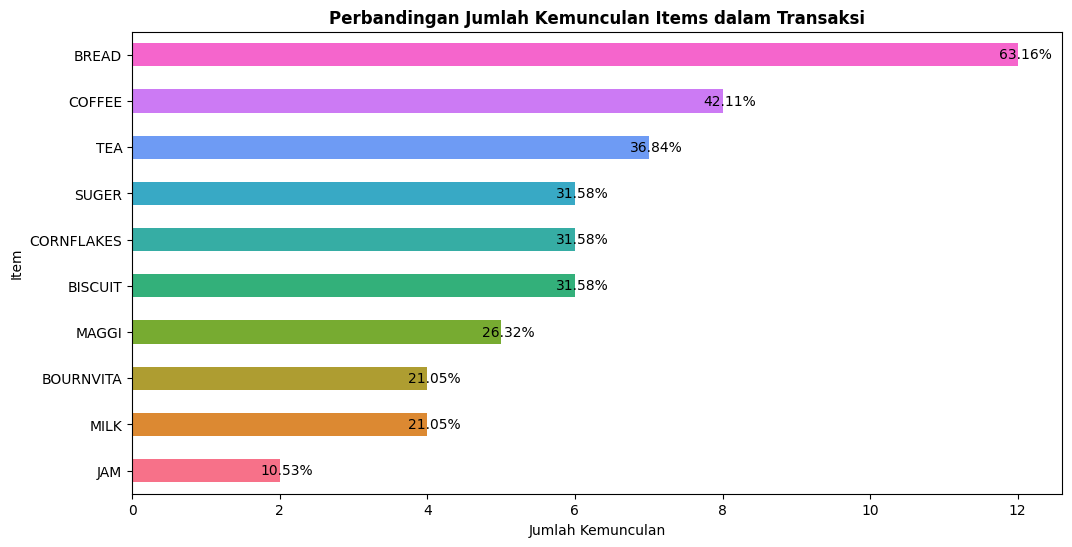

In [17]:
items_to_compare = ['JAM', 'MAGGI', 'SUGER', 'COFFEE', 'CHEESE', 'TEA', 'BOURNVITA', 'CORNFLAKES', 'BREAD', 'BISCUIT', 'MILK']
item_counts = df['NAME ITEMS'].apply(lambda x: pd.Series(x.split(','))).stack().value_counts()
item_counts = item_counts[item_counts.index.isin(items_to_compare)]
colors = sns.color_palette('husl', len(item_counts))
plt.figure(figsize=(12, 6))
ax = item_counts.sort_values().plot(kind='barh', color=colors)
plt.title('Perbandingan Jumlah Kemunculan Items dalam Transaksi', fontsize=12, fontweight='bold')
plt.xlabel('Jumlah Kemunculan')
plt.ylabel('Item')
for bar in ax.patches:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2 - 0.15,
             f'{(bar.get_width() / len(df) * 100):.2f}%', ha='center', va='bottom', color='black')

plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


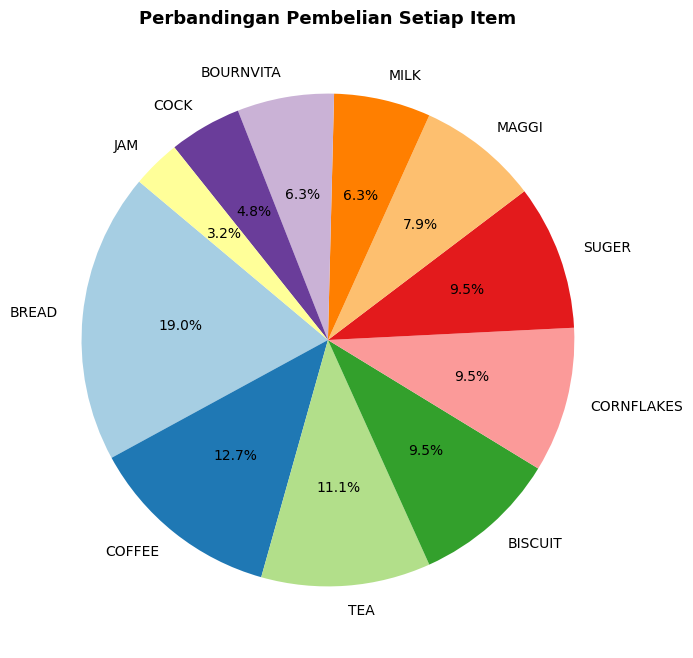

In [18]:

item_totals = df['NAME ITEMS'].str.split(',', expand=True).stack().value_counts()

# Pie plot perbandingan pembelian
plt.figure(figsize=(8, 8))
plt.pie(item_totals, labels=item_totals.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Perbandingan Pembelian Setiap Item', fontsize=13, fontweight='bold')
plt.show()

In [19]:

item_totals = df['NAME ITEMS'].str.split(',', expand=True).stack().value_counts().reset_index()
item_totals.columns = ['itemDescription', 'count']

# Membuat treemap
fig = px.treemap(item_totals, path=['itemDescription'], values='count', title='Frequency Items yang terjual')
fig.update_layout(title_x=0.5, title_font=dict(size=18))
fig.update_traces(textinfo="label+value",textfont=dict(color='white'))
# Menampilkan treemap
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Preprocessing

In [37]:
path=('supermarket/GroceryStoreDataSet.csv')
df = pd.read_csv(path,names = ['items'], sep = ',')
df.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,items
0,"MILK,BREAD,BISCUIT"
1,"BREAD,MILK,BISCUIT,CORNFLAKES"
2,"BREAD,TEA,BOURNVITA"
3,"JAM,MAGGI,BREAD,MILK"
4,"MAGGI,TEA,BISCUIT"


In [38]:
df_1  = df['items'].apply(lambda x : x.split(','))
df_1.head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0                [MILK, BREAD, BISCUIT]
1    [BREAD, MILK, BISCUIT, CORNFLAKES]
2               [BREAD, TEA, BOURNVITA]
Name: items, dtype: object

In [39]:
liste = []

for i in range(len(df_1)):
    x = df_1[i]
    print(x)
    liste.append(x)

['MILK', 'BREAD', 'BISCUIT']
['BREAD', 'MILK', 'BISCUIT', 'CORNFLAKES']
['BREAD', 'TEA', 'BOURNVITA']
['JAM', 'MAGGI', 'BREAD', 'MILK']
['MAGGI', 'TEA', 'BISCUIT']
['BREAD', 'TEA', 'BOURNVITA']
['MAGGI', 'TEA', 'CORNFLAKES']
['MAGGI', 'BREAD', 'TEA', 'BISCUIT']
['JAM', 'MAGGI', 'BREAD', 'TEA']
['BREAD', 'MILK']
['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES']
['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES']
['COFFEE', 'SUGER', 'BOURNVITA']
['BREAD', 'COFFEE', 'COCK']
['BREAD', 'SUGER', 'BISCUIT']
['COFFEE', 'SUGER', 'CORNFLAKES']
['BREAD', 'SUGER', 'BOURNVITA']
['BREAD', 'COFFEE', 'SUGER']
['BREAD', 'COFFEE', 'SUGER']
['TEA', 'MILK', 'COFFEE', 'CORNFLAKES']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [48]:
encoder = TransactionEncoder()
pred = encoder.fit_transform(liste)
df = pd.DataFrame(pred,columns = encoder.columns_)
df.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,True,False,True,False,False,False,False,False,True,False,False
1,True,False,True,False,False,True,False,False,True,False,False
2,False,True,True,False,False,False,False,False,False,False,True
3,False,False,True,False,False,False,True,True,True,False,False
4,True,False,False,False,False,False,False,True,False,False,True


# modeling

In [49]:
frequency = apriori(df,min_support = 0.15,use_colnames = True,verbose = 1)
frequency

Processing 117 combinations | Sampling itemset size 3


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,support,itemsets
0,0.35,(BISCUIT)
1,0.20,(BOURNVITA)
2,0.65,(BREAD)
3,0.15,(COCK)
4,0.40,(COFFEE)
5,0.30,(CORNFLAKES)
6,0.25,(MAGGI)
7,0.25,(MILK)
8,0.30,(SUGER)
9,0.35,(TEA)


In [50]:
rules =  association_rules(frequency,metric = 'lift',min_threshold = 0.8)
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(BREAD),(BISCUIT),0.65,0.35,0.20,0.307692,0.879121,-0.0275,0.938889,-0.282051
1,(BISCUIT),(BREAD),0.35,0.65,0.20,0.571429,0.879121,-0.0275,0.816667,-0.174603
2,(CORNFLAKES),(BISCUIT),0.30,0.35,0.15,0.500000,1.428571,0.0450,1.300000,0.428571
3,(BISCUIT),(CORNFLAKES),0.35,0.30,0.15,0.428571,1.428571,0.0450,1.225000,0.461538
4,(BREAD),(BOURNVITA),0.65,0.20,0.15,0.230769,1.153846,0.0200,1.040000,0.380952
5,(BOURNVITA),(BREAD),0.20,0.65,0.15,0.750000,1.153846,0.0200,1.400000,0.166667
6,(BREAD),(MAGGI),0.65,0.25,0.15,0.230769,0.923077,-0.0125,0.975000,-0.192308
7,(MAGGI),(BREAD),0.25,0.65,0.15,0.600000,0.923077,-0.0125,0.875000,-0.100000
8,(MILK),(BREAD),0.25,0.65,0.20,0.800000,1.230769,0.0375,1.750000,0.250000
9,(BREAD),(MILK),0.65,0.25,0.20,0.307692,1.230769,0.0375,1.083333,0.535714


In [51]:
rules['antecedents']=rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents']=rules['consequents'].apply(lambda a: ','.join(list(a)))
rules['rule'] = rules.index
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,rule
0,BREAD,BISCUIT,0.65,0.35,0.20,0.307692,0.879121,-0.0275,0.938889,-0.282051,0
1,BISCUIT,BREAD,0.35,0.65,0.20,0.571429,0.879121,-0.0275,0.816667,-0.174603,1
2,CORNFLAKES,BISCUIT,0.30,0.35,0.15,0.500000,1.428571,0.0450,1.300000,0.428571,2
3,BISCUIT,CORNFLAKES,0.35,0.30,0.15,0.428571,1.428571,0.0450,1.225000,0.461538,3
4,BREAD,BOURNVITA,0.65,0.20,0.15,0.230769,1.153846,0.0200,1.040000,0.380952,4
5,BOURNVITA,BREAD,0.20,0.65,0.15,0.750000,1.153846,0.0200,1.400000,0.166667,5
6,BREAD,MAGGI,0.65,0.25,0.15,0.230769,0.923077,-0.0125,0.975000,-0.192308,6
7,MAGGI,BREAD,0.25,0.65,0.15,0.600000,0.923077,-0.0125,0.875000,-0.100000,7
8,MILK,BREAD,0.25,0.65,0.20,0.800000,1.230769,0.0375,1.750000,0.250000,8
9,BREAD,MILK,0.65,0.25,0.20,0.307692,1.230769,0.0375,1.083333,0.535714,9


In [52]:
rules.sort_values('lift',ascending = False).head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,rule
14,COCK,COFFEE,0.15,0.40,0.15,1.000000,2.500000,0.0900,inf,0.705882,14
15,COFFEE,COCK,0.40,0.15,0.15,0.375000,2.500000,0.0900,1.36,1.000000,15
21,TEA,MAGGI,0.35,0.25,0.20,0.571429,2.285714,0.1125,1.75,0.865385,21
20,MAGGI,TEA,0.25,0.35,0.20,0.800000,2.285714,0.1125,3.25,0.750000,20
19,COFFEE,SUGER,0.40,0.30,0.20,0.500000,1.666667,0.0800,1.40,0.666667,19


In [53]:
rules.sort_values('confidence',ascending = False).head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,rule
14,COCK,COFFEE,0.15,0.40,0.15,1.000000,2.500000,0.0900,inf,0.705882,14
20,MAGGI,TEA,0.25,0.35,0.20,0.800000,2.285714,0.1125,3.25,0.750000,20
8,MILK,BREAD,0.25,0.65,0.20,0.800000,1.230769,0.0375,1.75,0.250000,8
5,BOURNVITA,BREAD,0.20,0.65,0.15,0.750000,1.153846,0.0200,1.40,0.166667,5
16,CORNFLAKES,COFFEE,0.30,0.40,0.20,0.666667,1.666667,0.0800,1.80,0.571429,16


# Visualisasi hasil algoritma

In [54]:
support_table = rules.pivot(index='consequents', columns='antecedents', values='support')
support_table.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(10, 10)

In [55]:
fig=ff.create_annotated_heatmap(support_table.to_numpy().round(2),x=list(support_table.columns),y=list(support_table.index),colorscale=['violet','indigo','blue'],font_colors=['white','white','white'])
fig.update_layout(template='simple_white',
    autosize=False,
    width=1600,
    height=1600,
    title="Support Matrix",
    xaxis_title='Consequents',
    yaxis_title='Antecedents',
    legend_title="Legend Title",
    font=dict(
        family="Caliber",
        size=14,
        color="Black"
    )
)
fig.update_layout(title_x=0.22, title_y=0.98)
fig.update_traces(showscale=True)
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [59]:
conf=rules.pivot(index='antecedents', columns='consequents', values='confidence')
fig=ff.create_annotated_heatmap(conf.to_numpy().round(2),x=list(conf.columns),y=list(conf.index),colorscale=['green','orange','red'],font_colors=['white','white','white'])
fig.update_layout(template='simple_white',
    autosize=False,
    width=1600,
    height=1600,
    title="Confidence Matrix",
    xaxis_title='Consequents',
    yaxis_title='Antecedents',
    legend_title="Legend Title",
    font=dict(
        family="Caliber",
        size=14,
        color="Black"
    )
)
fig.update_layout(title_x=0.22, title_y=0.98)
fig.update_traces(showscale=True)
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



# save model (pickle)

### Dikarenakan pada Apriori Stremlit.py menggunakan csv dari kaggle ketika melakukan load data, Maka tidak perlu melakukan import pickle.sav.